In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [2]:
r = readers.CollectionReader('../src/value_init/agents/')

100%|██████████| 5/5 [00:00<00:00, 12.51it/s]


In [3]:
#games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
#         "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
#         "InvertedDoublePendulum-v2"]
games = ['Humanoid-v2']
code_level_opts = {
      'clip_eps': [0.2],
      'kl_penalty_coeff': [0.0],
      'norm_advantages': [True],
      'initialization_value_scale': [0.1, 0.5, 1.0, 2.0, 10.0]
}

In [4]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

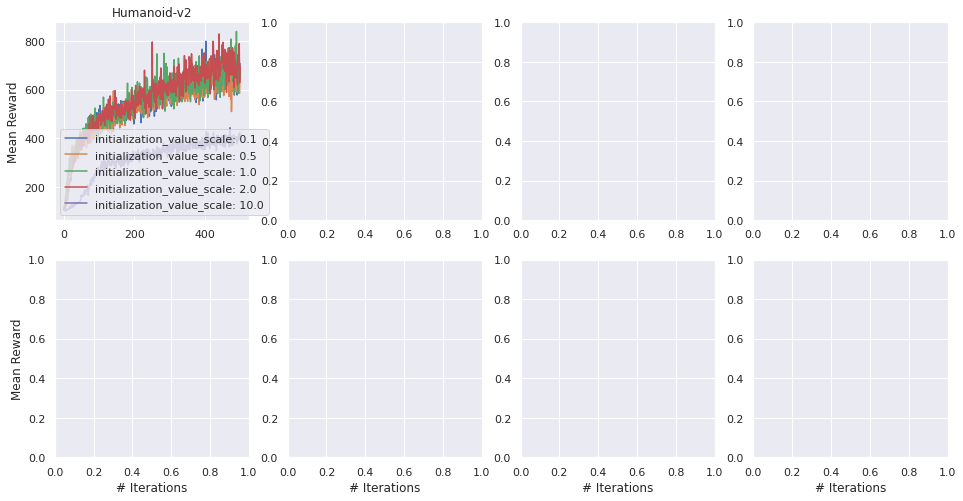

In [5]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'initialization_value_scale'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()